In [ ]:
# Užduotis - paskaičiuoti geriausio modelio spėjimo įverčius (R2 score, etc), lyginannt spėjimą su NordPool
# faktu.

# Užduotis - parašyti skriptą, kuris pateiktų prognozę tiesiog skaičiuodamas vidutines vertes (pagal vidurkius)
# Palyginkite šio skripto prognozės tikslumą su dviem savo geriausiais modeliais 
# (pagal koreliacijos koef, R2 score, MAE, MSE, RMSE ...)

In [ ]:
# https://www.kaggle.com/competitions/titanic/overview/evaluation 

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

In [2]:
df1 = pd.read_excel(r"C:\Users\Batia\Downloads\b2b_gv_vartojimas.xlsx\b2b_gv_vartojimas.xlsx")

In [3]:
df1.head(30)

,data_valanda,0,1,2,3,4,5,6,7,8,...,753,754,755,756,757,758,759,760,761,762
0,2022-11-01 00:00:00,0.0,0.0,4.68,0.001,0.0,0.0,1.7159,1.9334,1.4671,...,5.0,0.4199,23.40,0.0,0.0,5.9883,91.9,0.3135,6.9318,2.8310
1,2022-11-01 01:00:00,0.0,0.0,4.34,0.001,0.0,0.0,1.0673,0.5732,1.1481,...,4.7,0.3783,22.44,0.0,0.0,5.2497,90.5,0.2949,5.3964,2.8309
2,2022-11-01 02:00:00,0.0,0.0,4.12,0.000,0.0,0.0,1.3911,1.1709,4.9880,...,4.7,0.3251,22.26,0.0,0.0,4.7670,94.7,0.1766,5.3742,2.8025
3,2022-11-01 03:00:00,0.0,0.0,4.16,0.002,0.0,0.0,1.4227,0.4989,1.2216,...,4.5,0.1573,21.84,0.0,0.0,4.1760,92.0,0.1443,5.5298,2.8072
4,2022-11-01 04:00:00,0.0,0.0,4.52,0.001,0.0,0.0,1.0054,0.5903,1.2296,...,4.5,0.1448,22.08,0.0,0.0,4.2792,89.4,0.1266,5.9279,2.8221
5,2022-11-01 05:00:00,0.0,0.0,4.22,0.000,0.0,0.0,1.4446,0.9710,1.2291,...,7.4,0.1447,22.98,0.0,0.0,3.9978,91.9,0.1250,5.4580,2.8461
6,2022-11-01 06:00:00,0.0,0.0,5.42,0.000,0.0,0.0,1.5312,0.5344,3.5924,...,9.0,0.1679,26.04,0.0,0.0,3.7581,138.2,0.1227,4.6716,2.8364
7,2022-11-01 07:00:00,0.0,0.0,4.40,0.006,0.0,0.0,1.0230,1.0537,1.3537,...,5.6,0.2181,42.24,0.0,0.0,3.4377,174.9,0.1152,4.2390,2.8208
8,2022-11-01 08:00:00,0.0,0.0,3.12,0.000,0.0,0.0,1.1793,0.5709,3.0640,...,6.4,0.2092,36.72,0.0,0.0,3.7704,164.4,0.0648,5.3166,2.0905
9,2022-11-01 09:00:00,0.0,0.0,2.28,0.000,0.0,0.0,2.1306,0.8206,3.2402,...,46.0,0.2100,32.22,0.0,0.0,5.1210,162.4,0.0356,1.9519,2.2980


In [6]:
df1['all_consumtion'] = df1.iloc[:, 1:].sum(axis=1)

In [8]:
df1['dateTime'] = pd.to_datetime(df1['data_valanda'])

In [9]:
df = df1[['dateTime', 'all_consumtion']].copy()

In [10]:
df['hour'] = df['dateTime'].dt.hour 
df['day'] = df['dateTime'].dt.day
df['month'] = df['dateTime'].dt.month
df['weekday'] = df['dateTime'].dt.weekday

In [11]:
df.head()

,dateTime,all_consumtion,hour,day,month,weekday
0,2022-11-01 00:00:00,5067.686718,0,1,11,1
1,2022-11-01 01:00:00,4934.976191,1,1,11,1
2,2022-11-01 02:00:00,4959.082150,2,1,11,1
3,2022-11-01 03:00:00,4906.838115,3,1,11,1
4,2022-11-01 04:00:00,4897.787559,4,1,11,1


In [12]:

mean_per_hour = df.groupby('hour')['all_consumtion'].mean()


mean_per_hour_df = mean_per_hour.reset_index()
mean_per_hour_df.columns = ['Hour', 'Mean Energy Consumption']

In [13]:
mean_per_hour_df

,Hour,Mean Energy Consumption
0,0,7140.373945
1,1,7005.480279
2,2,6966.459065
3,3,6968.175541
4,4,7017.170202
5,5,7374.667293
6,6,8895.285628
7,7,10733.349943
8,8,12062.228124
9,9,11602.912200


In [15]:
nordpool_df = pd.read_excel(r"C:\Users\Batia\Desktop\2025-01-12-NORDPOOLMWh.ods")

In [16]:
nordpool_df.head(30)

,Unnamed: 0,Unnamed: 1
0,Laikas,MWH
1,01:00-02:00,1274.8
2,02:00-03:00,1243.3
3,03:00-04:00,1223.8
4,04:00-05:00,1219.3
5,05:00-06:00,1239.5
6,06:00-07:00,1295
7,07:00-08:00,1368
8,08:00-09:00,1439.5
9,09:00-10:00,1532


In [18]:
nordpool_df = nordpool_df[1:].reset_index(drop=True)

In [20]:
nordpool_df['Hour'] = nordpool_df['Unnamed: 0'].str.extract(r'(\d{2})')

In [22]:
nordpool_df = nordpool_df.groupby(['Hour']).sum().reset_index()

In [24]:
nordpool_df['Hour'] = nordpool_df['Hour'].astype(int)

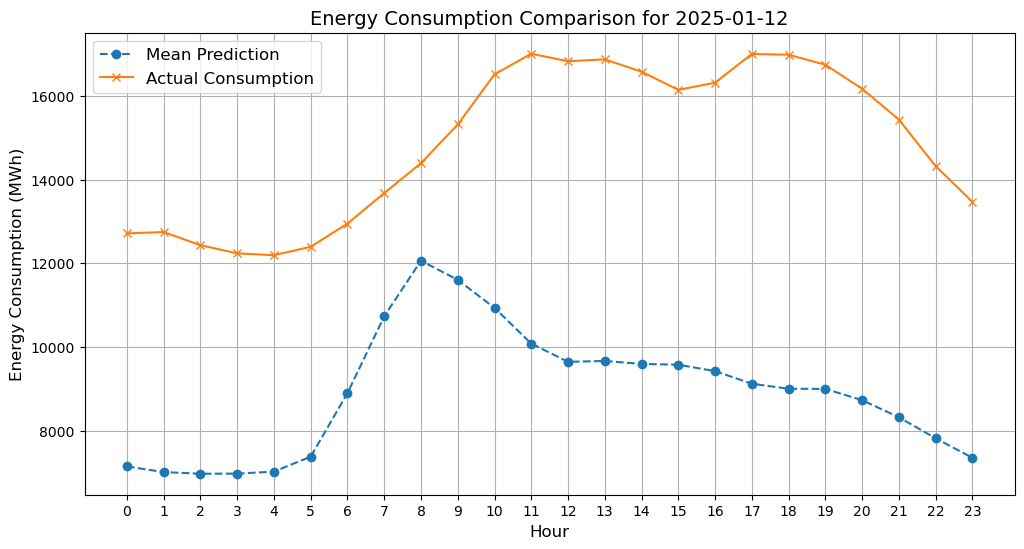

In [33]:
import matplotlib.pyplot as plt

# Provided mean energy consumption for each hour
# mean_consumption_data = {
#     'Hour': list(range(24)),
#     'Mean Energy Consumption': [
#         7140.373945, 7005.480279, 6966.459065, 6968.175541, 7017.170202,
#         7374.667293, 8895.285628, 10733.349943, 12062.228124, 11602.912200,
#         10933.589452, 10078.761473, 9643.498315, 9663.274339, 9593.428572,
#         9573.432315, 9420.577183, 9119.242189, 8998.541676, 8995.225158,
#         8726.218800, 8317.035329, 7814.034527, 7346.751819
#     ]
# }
mean_df = pd.DataFrame(mean_per_hour_df)



comparison_df = pd.merge(mean_df, nordpool_df, on='Hour')


plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Hour'], comparison_df['Mean Energy Consumption'], label='Mean Prediction', linestyle='--', marker='o')
plt.plot(comparison_df['Hour'], comparison_df['Unnamed: 1']*10, label='Actual Consumption', linestyle='-', marker='x')


plt.title('Energy Consumption Comparison for 2025-01-12', fontsize=14)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Energy Consumption (MWh)', fontsize=12)
plt.xticks(range(24))
plt.legend(fontsize=12)
plt.grid(True)


plt.savefig("energy_consumption_comparison.png")


plt.show()


In [34]:
a = ([1,2,3],[4,5,6])
print(a)
a[0][1]='A'
print(a)

([1, 2, 3], [4, 5, 6])
([1, 'A', 3], [4, 5, 6])


In [ ]:
/8.25

In [ ]:
y = prognoze/0.00825/1e3